**Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

- The fundamental idea behind ensemble techniques is to combine multiple base models in order to build a stronger overall predictor than any single model could deliver on its own. In essence, rather than relying on one algorithm trained on one dataset, an ensemble leverages diversity and aggregation: you create a set of models (often using the same algorithm but with different data, parameters or random seeds), and then you aggregate their predictions (for example by averaging or voting) so that individual errors tend to cancel out or be mitigated
- This process improves generalization, reduces the risk of overfitting or high variance, and often yields more reliable and accurate predictions than a single learner alone.
- When comparing two of the most popular ensemble strategies, bagging (Bootstrap Aggregating) and boosting, the difference lies both in how the base models are constructed and in what error component they primarily try to address. In bagging, multiple base models are trained in parallel and independently, each on a different random bootstrap sample of the training data (sampling with replacement). Then their outputs are combined (for classification via majority vote, for regression via averaging). The chief objective of bagging is to reduce variance — it stabilizes predictions when base learners are unstable (like deep trees) by averaging them.
- In contrast, boosting trains the base learners sequentially, where each new learner focuses on correcting the errors made by the preceding learners: the mis-classified or difficult instances are given higher weight or emphasis. The models are then aggregated (often via a weighted sum) to form the final predictor. The primary objective of boosting is to reduce bias (and also overall error) by turning many “weak” learners into a “strong” one.
- Thus, bagging emphasizes robustness through parallel diversity and averaging, while boosting emphasizes adaptively improving where previous models erred in a sequential manner.

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

- The classifier Random Forest Classifier (RFC) mitigates over-fitting relative to a single decision tree by relying on two strategies: averaging over many trees built on different random subsets of the data (bagging) and introducing randomness into the feature‐selection process for each split. A single decision tree tends to grow deep, tailor itself to the training data and thereby capture noise and idiosyncrasies (high variance, low bias), making it prone to over‐fitting. In contrast, in RFC each individual tree is trained on a bootstrap sample (i.e., sampling with replacement) so that each tree sees a different view of the data, and then predictions are aggregated (majority vote for classification) which averages out the idiosyncratic errors of individual trees.
- Two key hyperparameters play a crucial role in this over-fitting control. First is n_estimators (the number of trees in the forest): by increasing the count of trees, the variance of the ensemble prediction tends to shrink (because many independent estimators’ errors tend to cancel out) which improves generalization.
- Second is max_features (the number or fraction of features randomly considered for splitting at each node): by restricting each tree to consider only a random subset of features, RFC reduces the correlation between trees (they become more diverse) and prevents many trees from repeatedly relying on the same dominant features and over‐fitting to them.
- In combination, these hyperparameters (and the underlying randomization and averaging mechanism) allow Random Forest to maintain a low bias (close to decision tree’s modelling capacity) while markedly reducing variance (the propensity to over‐fit) and thus improving performance on unseen data compared to a single decision tree.


**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

- In ensemble learning, stacking (also known as stacked generalization) is a technique wherein you train multiple “base” models on the same problem and then train a second-level “meta-model” to combine their predictions into a final output. The idea is that each base model (for example, a decision tree, a support vector machine, a neural network) may have different strengths and weaknesses; by taking their predictions as features for a meta-model, you give the meta-learner the opportunity to learn how best to combine those base predictions so as to yield a better overall predictor.
- How does this differ from more traditional ensemble methods such as bagging or boosting? In bagging you train many independent homogeneous models (often the same algorithm) on different bootstrap-samples of the data, then combine by averaging or voting — the main goal being to reduce variance by averaging out fluctuations.
- In boosting you train models sequentially, where each next model focuses on correcting the errors of the previous ones — the main goal being to reduce bias (and sometimes variance) by adaptively focusing on “hard” cases.
- In contrast, stacking typically uses a heterogeneous mix of base learners (not necessarily all of the same type) and crucially introduces a meta-model that learns how to weight or combine the base learners’ outputs; it is not simply an average or voting, nor a sequential refitting on error as in boosting.
- Here’s a simple example use-case: Suppose you are solving a binary classification problem of predicting customer churn. You might train three base models: a logistic regression model, a random forest, and a support vector machine. Once they are trained, you apply them on a held-out validation set (or via cross-validation) to get their predictions (for example the predicted probabilities of churn). You then take those predictions (three numbers per customer) as new features, and train a meta-model (say a gradient-boosted tree or a logistic regression) to predict the final churn label. The meta‐model thus learns which base models are more reliable in which situations and how to combine them. Because you are using different model types and letting the meta‐learner decide their optimal combination, you may achieve a better predictive performance than any one of the base models alone, or than a simple bagging or boosting ensemble of one model type.


**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

- The Out-of-Bag (OOB) score in a RandomForestClassifier is an internal estimate of generalisation performance that exploits the bootstrap sampling of trees rather than requiring a separate validation set. Each tree in the random forest is trained on a bootstrap sample (i.e., drawing with replacement) of the original training dataset, so about one-third of the data (on average ~ 33 %) is not included in each tree’s training sample and is thus “out-of-bag” for that tree. For a given training instance, one can aggregate predictions across all trees for which that instance was out‐of‐bag, then compare the aggregated prediction to the true label — doing this for all instances yields the OOB error (or equivalently the OOB score = 1 − error) as a measure of unseen-data performance.
- This mechanism is useful because it gives an unbiased (or at least approximately unbiased) estimate of how well the random forest will perform on new, unseen data without having to set aside a dedicated validation or test set. Since each instance gets evaluated as “unused by some subset of trees”, one thereby reuses essentially all of the data for both training and “validation”, which is particularly advantageous when the dataset is modest in size. Moreover, you can monitor the OOB score as more trees are added and detect when it stabilises, helping with hyper-parameter tuning (for example choosing the number of trees) without extra hold-out splits.


Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

- AdaBoost handles errors from weak learners by identifying the particular training instances that were misclassified by the current model and then increasing their importance (weight) in the next round of training. In each iteration AdaBoost assigns larger weights to the examples that were mis-classified, so subsequent weak learners focus more on the “hard” cases. he weight adjustment mechanism thus works on the sample-level (training instances) and on the classifier level: each weak learner is given a weight in the final combined model according to its accuracy (better learners get higher weight). Typical use cases for AdaBoost are binary classification problems where you have relatively clean data, want a quick off-the-shelf boosting solution, and can assume your weak learners are a little better than random. Because AdaBoost can be sensitive to noisy data and outliers (since misclassifications continue to get higher weight) it works best when the data is well-behaved
- In contrast, Gradient Boosting handles errors from weak learners by treating boosting as a gradient-descent optimization problem: at each stage it fits a new weak learner to the residuals (or pseudo-residuals) of the current ensemble (i.e., the differences between actual targets and current predictions). The weight-adjustment mechanism in gradient boosting is more indirect: instead of re-weighting specific samples explicitly, it adds a new learner that tries to reduce the loss (via gradients) of the ensemble overall, and often uses a “learning rate” (shrinkage) parameter to scale the contribution of each new learner, thus controlling overfitting. Typical use cases for Gradient Boosting include both classification and regression problems (including multi-class, non-binary tasks) and scenarios where you need more flexibility in loss function, regularization (via learning-rate, tree depth, subsampling) and desire greater accuracy at the cost of more tuning.


Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

- The algorithm CatBoost performs very well on categorical features because it is explicitly built to handle them natively rather than forcing the user to perform extensive—and often error-prone—pre-processing. In typical machine-learning pipelines, categorical variables must be converted into numerical form (through one-hot encoding, label encoding, target encoding, etc.), which can lead to extremely large feature spaces (if one-hot and high-cardinality), unintended ordinal implications (if label encoding), or target leakage (if naïve target encoding). As noted in its documentation, CatBoost transforms categorical features during model training via target-statistics-based encoding and ordered boosting/permutations, thereby mitigating data-leakage and over-fitting concerns.

- More precisely, CatBoost uses techniques such as “ordered” target encoding—where for each categorical feature value the aggregated target statistics (e.g., mean target) are computed in a permutation-aware manner so that when encoding the value for a given row, only information from preceding rows in the permutation is used (thus avoiding leaking future information). At the same time, for low-cardinality categorical features it may apply one-hot encoding up to a threshold, while for higher cardinality it uses these internal statistics (“count-based” or “mean­based” encoding) and then splits those encoded numeric values inside its decision-trees.
- Because of this, the user simply marks which features are categorical (via the cat_features parameter) and CatBoost takes care of encoding internally, preserving the natural structure of categories without massively exploding the feature space or inadvertently inducing ordinal relations. This streamlined handling reduces the feature engineering burden, avoids many pitfalls of typical categorical encoding, and results in better generalization especially in datasets with many categorical variables or high-cardinality features.


In [1]:
'''
Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find th
'''

# 1) Load the dataset:

from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target

# 2) Split into training (70%) and test (30%):

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

#3)Train a KNN classifier (default n_neighbors=5) without scaling, then evaluate:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

#4) Apply scaling (e.g., StandardScaler), retrain KNN, and compare metrics:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

knn2 = KNeighborsClassifier()
knn2.fit(X_train_scaled, y_train)
y_pred2 = knn2.predict(X_test_scaled)

print("Accuracy after scaling:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2, target_names=data.target_names))

#5)Use GridSearchCV to optimize hyperparameters (for example n_neighbors, weights, metric) on the scaled data:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid,
                    cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("Test accuracy best:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=data.target_names))


Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Accuracy after scaling: 0.9444444444444444
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Test accuracy best: 0.9814814814814815
              precision    recall  f1-score   supp

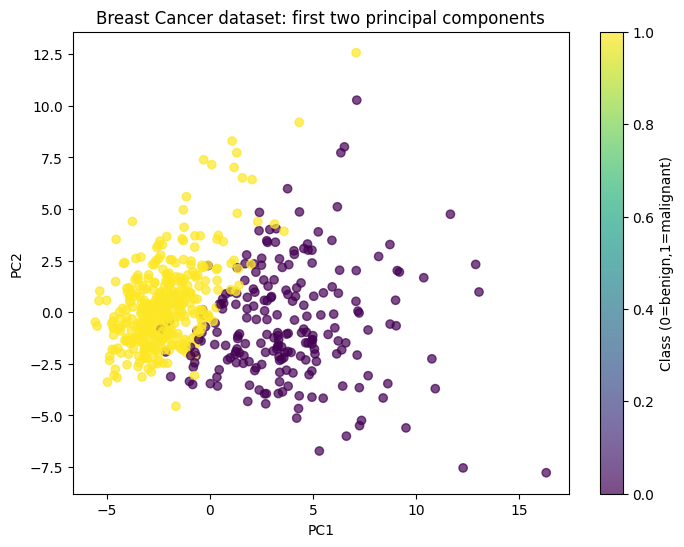

In [2]:
'''
Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

'''

# 1. Load the dataset

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Apply scaling & PCA, then plot a scree‐plot (explained variance ratio)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''
Then apply PCA without restricting the number of components initially, so you can inspect how much variance each component explains:
'''
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

#3. Retain 95% variance and transform the dataset

pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

#4. Train KNN on original data vs PCA‐transformed data, then compare accuracy

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)
'''
5. Visualize the first two principal components using a scatter plot (colored by class)

Since you have the PCA transformation results, you can take the first two components (the first two columns of X_pca or of full transformation) and plot a 2-D scatter:
'''

import matplotlib.pyplot as plt

X_two = pca_95.transform(X_scaled)[:, :2]  # or use full PCA then [:, :2]
plt.figure(figsize=(8,6))
plt.scatter(X_two[:,0], X_two[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer dataset: first two principal components')
plt.colorbar(label='Class (0=benign,1=malignant)')
plt.show()


In [ ]:
'''
Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
'''

#1 Generate a synthetic regression dataset, e.g. using:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)


# 2)Train a KNeighborsRegressor with:

'''Euclidean distance (i.e., default metric “minkowski” with p=2) and K = 5

Manhattan distance (i.e., metric “minkowski” with p=1 or explicitly “manhattan”) and K = 5
Then compute and compare the Mean Squared Error (MSE) for both models.'''
'''
3)

Vary K among values (e.g., K = 1, 5, 10, 20, 50). For each K train (you might pick one distance metric e.g. Euclidean or compare both)
 and compute the MSE on a held-out test set (so you should split data into training and test).
 Then plot K vs MSE. This plot helps you analyze the bias-variance trade-off:
  small K tends towards low bias/high variance; large K tends towards higher bias/lower variance.
'''

In [ ]:
'''
Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes
'''

#1)
''' Load the Pima Indians Diabetes dataset
The dataset has 768 observations and 8 numeric features (plus the outcome) from female patients of Pima Indian heritage.
Note: Although many sources say the dataset has no null values, in practice some feature values of “0”
(for features like BMI, insulin, skin thickness) are physiologically impossible / indicate missingness, so you should treat them as missing.

2) Use KNN Imputation (`sklearn.impute.KNNImputer) to fill missing values

First convert “invalid zeros” (for features like Glucose, BloodPressure, SkinThickness, Insulin, BMI)
 into NaN, because they cannot be physically zero.
 Then apply KNNImputer(n_neighbors=k_impute, ... ) to impute values based on similar rows.
This helps in avoiding deleting many rows and uses neighbor similarity to infer missing feature values.

3) Train KNN models using three algorithmic approaches

Use sklearn.neighbors.KNeighborsClassifier (or regressor depending on your variant, but here since it’s classification you’ll use classifier). In sklearn, you can specify the algorithm parameter:

algorithm='brute' → brute-force neighbor search

algorithm='kd_tree' → using KDTree data structure

algorithm='ball_tree' → using BallTree data structure
This is described in the sklearn docs: the algorithm parameter controls which method is used.

4)

Compare training (or query) time and accuracy

Measure how long it takes to .fit() (and/or .predict()) for each algorithm.

Measure accuracy on a held‐out test set (you’ll want to split into train/test after imputation).

Discuss differences: For relatively small datasets or high dimensionality the
 tree‐based methods may not outperform brute force because of overhead & curse of dimensionality.
  For example, one source notes that KDTree may be slower than brute force when dimensionality is high.

5) Plot decision boundary for the best-performing method (using 2 most important features)

Choose the best model (algorithm with highest accuracy and reasonable time).

Determine the two most important features (you may use domain knowledge or feature importances from another model) –
for example Glucose and BMI or whatever seems most predictive.

Reduce dataset to these two features, re-train KNN on them, and plot the decision boundary (using matplotlib/numpy)
 showing class regions and test points. This visualises how the KNN classifier partitions the 2D feature space.
